<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 2

## Q1: Show that the correlation co-efficient is indeed related to the fraction of varaince explained by a linear dependence.

**1** To start, make a $N(0,1)$ random variable $x$, with 200,000 entries.  Then make a linearly dependent variable $y_i= a x_i + n_i$, where a is some amplitude, and $n_i$ is a random noise varaible.  Assume that $n_i$ is distributed as $N(0,n)$, where $n$ is the noise level.

Calculate the correlation co-efficient $r_{xy}$ between $x$ and $y$ for 40 different values of $n$, logarithmically spaced between 0.01 and 100. (hint use `np.logspace`).  

Plot $r_{xy}$ versus the inverse of the noise $n$ normalized by the standard devaition of the signal $ax_i$: $\frac{a s_x}{n}$   You may want to use `ax.loglog` to visualize the orders of magnitude.  

Comment on the resulting comparison.

#### Coding hint:

You are going to need to generate 40 realizations of the random process, so do this in a `for`-loop, and save the results in an array that you initialize before the for-loop:
```python
r = np.zeros(40)
for ind,n in enumerate(noisevalues):
  # make your random variable
  ...
  # calculate r
  r[ind]=...
```
<hr>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

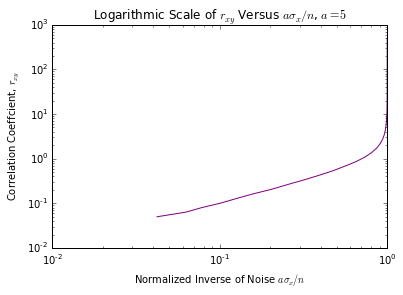

In [3]:
# YOUR CODE HERE
N = 200000
a = 5.0
noisevalues = np.logspace(-2,2, num=40)
r = np.zeros(40)
xstd = np.zeros(40)
for ind,n in enumerate(noisevalues):
    x = np.random.randn(N); xstd[ind] = np.std(x,ddof=1) ;x = (x - np.mean(x) )/ np.std(x)
    ni = np.random.normal(0,noisevalues[ind],N)
    y = a*x + ni
    r[ind] = np.sum(x*y)/np.std(x,ddof=1)/np.std(y,ddof=1)/(N-1)
Noise = a*xstd/noisevalues
fig=plt.figure();ax=fig.add_subplot(1,1,1); 
ax.loglog(r,Noise,color = 'purple'); ax.set_title('Logarithmic Scale of $r_{xy}$ Versus $ {a \sigma _{x}}/{n}$, $a=5$')
ax.set_xlabel('Normalized Inverse of Noise $a \sigma _{x} / n$');ax.set_ylabel('Correlation Coeffcient, $r_{xy}$')


The comparison of the normalized inverse of the noise to the correlation coefficient is hard to explain exactly what is happening. As the normalized inverse of the noise approaches a value of 1, the coeffcient appears to go towards infinity. Also the normalized noise inverse does not exist past a certain point on the x-axis. A little bit after $10^{-1}$ it stops. From here it looks as if it is almost a 1-1 ratios, until you get past a value of 1 for the correlation coefficient.  

**2** Repeat the above, but with a different value of $a$.  Comment on how (and why) $a$ changes the value of $r_{xy}$.  

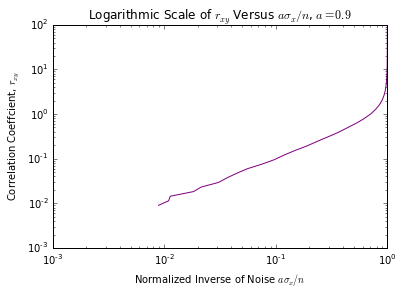

In [4]:
# YOUR CODE HERE
a = 0.9
r = np.zeros(40)
xstd = np.zeros(40)
for ind,n in enumerate(noisevalues):
    x = np.random.randn(N); xstd[ind] = np.std(x,ddof=1) ;x = (x - np.mean(x) )/ np.std(x)
    ni = np.random.normal(0,noisevalues[ind],N)
    y = a*x + ni
    r[ind] = np.sum(x*y)/np.std(x,ddof=1)/np.std(y,ddof=1)/(N-1)
Noise = a*xstd/noisevalues
fig=plt.figure();ax=fig.add_subplot(1,1,1); 
ax.loglog(r,Noise,color = 'purple'); ax.set_title('Logarithmic Scale of $r_{xy}$ Versus $ {a \sigma _{x}}/{n}$, $a=0.9$')
ax.set_xlabel('Normalized Inverse of Noise $a \sigma _{x} / n$');ax.set_ylabel('Correlation Coeffcient, $r_{xy}$')

The value of a changes the value of $r_{xy}$ becausse it depends on the value y, which in tuen depends on the value a. Thus when a changes so does the value of $r_{xy}$.

## Q2: Monte Carlo on slopes and test versus student-t distribution

**1** We stated without proof that the slope $b$ of a linear fit of $y$ to $x$ is distributed as a student-t distribution with $N-2$ degrees of freedom, with a standard devaition given by the standard deviation of $y$ around the fit model $\tilde{y}$.   Lets test that emperically using a Monte Carlo technique.  

First create an independet variable $x$ from 10 points from an $N(0,1)$ distribution.

Next, using $n=1.0$, and $a=1.0$ create the dependent variables $y_i=a x_i + n_i$ where $n_i$ are drawn from the $N(0,n)$ distribution.  Calculate the slope $b$.  

Do this 10000 times, and make a histogram of the resulting fits $b$.  Also histogram $s_{y|x}$ as defined in the notes.

Comment on the histigrams

<hr>

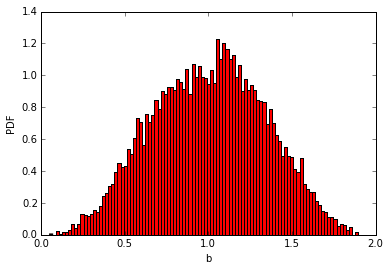

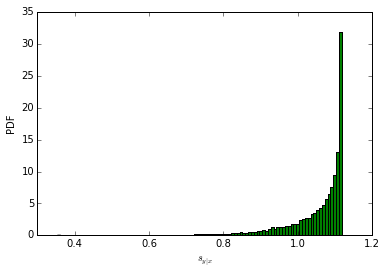

In [16]:
# YOUR CODE HERE
N = 10000
Npoint = 10
A = 1.0
NN = 1.0
b = np.zeros(N)
a = np.zeros(N)
syx = np.zeros(N)
for ind,n in enumerate(b):
    x = np.random.normal(0., 1., Npoint); x = (x-np.mean(x))/np.std(x)
    ni = np.random.normal(0., NN, Npoint); ni = (ni-np.mean(ni))/np.std(ni)
    y = np.zeros(10)
    y = A*x + ni
    b[ind] = ( np.sum(x*y)-N*np.mean(x)*np.mean(y) )/( (np.sum(x**2)-N*np.mean(x)**2) )
    a[ind] = np.mean(y)-b[ind]*np.mean(x)
    yhat=b[ind]*x+a[ind]
    syx[ind] = np.sqrt(np.sum((y-yhat)**2)/(Npoint-2))
    
fig=plt.figure();ax=fig.add_subplot(1,1,1); 
ax.hist(b, 100,color = 'red', normed =True)
ax.set_xlabel('b');ax.set_ylabel('PDF')
fig=plt.figure();ax=fig.add_subplot(1,1,1); 
ax.hist(syx, 100,color = 'green',normed =True)
ax.set_xlabel('$s_{y|x}$');ax.set_ylabel('PDF')

The b-histogram appears to behave like a normalized distribution centred around a value of 1. The $s_{y|x}$ histogram does not follow this trend but instead had a higher chance of being greater than 1 in most cases.

**2** Assuming $s_{y|x}=1.$ (which is the same as our value of $n$), plot the student-t probability density function on the histogram of b and show that they compare favorably (if they don't you might need to check your work!)

<hr>

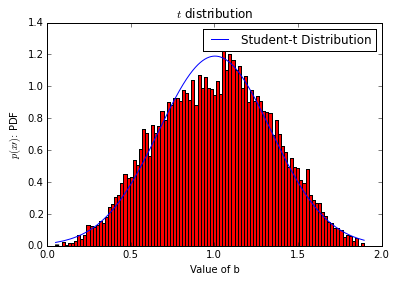

In [17]:
# YOUR CODE HERE
b.sort()
fig,ax=plt.subplots(1,1)
y = stats.norm.pdf(b, loc=np.mean(b), scale=np.std(b))
ax.plot(b,y, label='Student-t Distribution')
ax.hist(b, 100,color = 'red', normed =True)
ax.legend();ax.set_title('$t$ distribution'); ax.set_xlabel('Value of b')
ax.set_ylabel('$p(x\prime)$: PDF')

**3** Do the same procedure for a different number of data points, and a different value for the noise level $n$.  Remember to scale your theoretical histogram by the new expected value of $s_{y|x}$.

In [18]:
# YOUR CODE HERE
N = 10000
Npoint = 100
bb = np.zeros(N)
for ind,n in enumerate(b):
    xx = np.random.normal(0., 1., Npoint); xx = (xx-np.mean(xx))/np.std(xx)
    nni = np.random.normal(0., NN, Npoint);
    yy = np.zeros(Npoint)
    yy = xx + nni
    bb[ind] = ( np.sum(xx*yy)-N*np.mean(xx)*np.mean(yy) )/( (np.sum((xx)**2)-N*np.mean(xx)**2) )


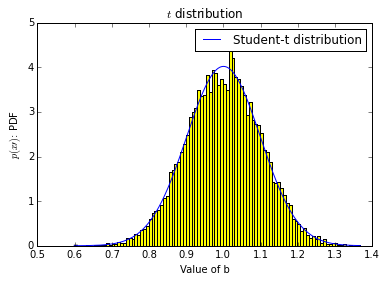

In [19]:
bb.sort()
fig,ax=plt.subplots(1,1)
f = stats.norm.pdf(bb,loc=np.mean(bb), scale=np.std(bb))
ax.plot(bb,f, label='Student-t distribution')
ax.hist(bb, 100,color = 'yellow', normed =True)
ax.legend();ax.set_title('$t$ distribution'); ax.set_xlabel('Value of b')
ax.set_ylabel('$p(x\prime)$: PDF')

## Q3: Linear comparison of Deep Cove data to James Bay temperature data

Data was collected from a number of weather stations by the Victoria Weather Network.  In the file below is hourly temperature data (in degrees Celsius) and we will consider two of the stations in that file:

In [20]:
# Load the data:

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]
dcc=dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc


**1** Make a scatterplot of James Bay versus Deep Cove.

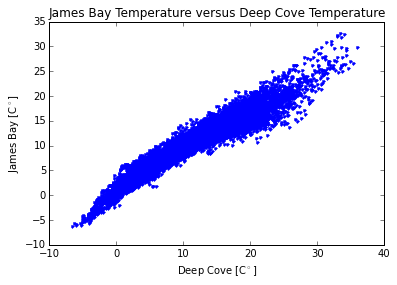

In [27]:
# YOUR CODE HERE
N = dc.size
fig,ax=plt.subplots(1,1)
ax.plot(dc,jb,'.')
ax.set_xlabel('Deep Cove [C$^\circ $]');ax.set_ylabel('James Bay [C$^\circ $]')
ax.set_title('James Bay Temperature versus Deep Cove Temperature')

**2** Compute the linear Correlation Co-efficient (without a canned routine)

In [28]:
# YOUR CODE HERE
r  = np.sum(dc*jb)/np.std(dc,ddof=1)/np.std(jb,ddof=1)/(N-1)
print 'Correlation Co-efficient :%.3f' %r

Correlation Co-efficient :4.679


**3** Fit a straight line to the James Bay data as a fucntion of the Deep Cove data, and add to the scatter plot made above.  Comment on the fit.

<hr>

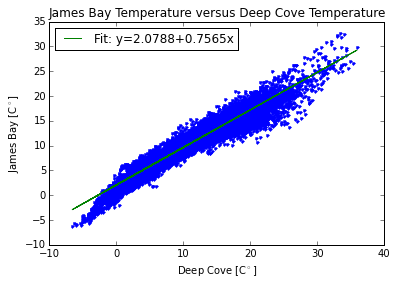

In [29]:
# YOUR CODE HERE
b = np.sum(jb*dc)-N*np.mean(dc)*np.mean(jb)
b = b/(np.sum(dc**2)-N*np.mean(dc)**2)
a = np.mean(jb)-b*np.mean(dc)
jbhat=b*dc+a

fig,ax=plt.subplots(1,1)
ax.plot(dc,jb,'.')
ax.plot(dc,jbhat,'-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
plt.legend(loc=0)
ax.set_xlabel('Deep Cove [C$^\circ $]');ax.set_ylabel('James Bay [C$^\circ $]')
ax.set_title('James Bay Temperature versus Deep Cove Temperature')

The straight line appears to fit well in the scatter plot, with a y-intercept of 2.0788 and a slope of 0.7565.

**4** Add the confidence intervals to your fit, and comment.

Slope b is between 0.753791 and 0.759110 with 95% probability


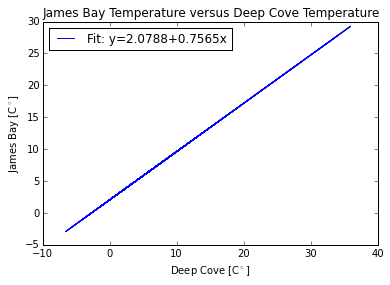

In [31]:
# YOUR CODE HERE
syx=np.sqrt(np.sum((jb-jbhat)**2)/(N-2))
bdn,bup=stats.t.interval(0.95,df=N-2,scale=syx)
bb=np.array([bdn,bup])
bb=bb/np.sqrt(np.sum((dc-np.mean(dc))**2))
print 'Slope b is between %f and %f with 95%% probability'%(b+bb[0],b+bb[1])
ddc=np.sort(dc)

#Plotting again
fig,ax=plt.subplots(1,1)
ax.plot(dc,jbhat,'-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
plt.legend(loc=0)
ax.set_xlabel('Deep Cove [C$^\circ $]');ax.set_ylabel('James Bay [C$^\circ $]')

yhathigh=(b+bb[1])*(ddc-np.mean(dc))+np.mean(jb)
yhatlow=(b+bb[0])*(ddc-np.mean(dc))+np.mean(jb)
ax.fill_between(ddc,yhathigh,yhatlow,alpha=0.4)
ax.set_title('James Bay Temperature versus Deep Cove Temperature')

The confidence intervals are very small, thus proving that the line was a good fit for the data from above.

**5** Note that we have assumed that the Deep Cove data is independent and that the James Bay data is dependent.  There is no reason to assume this!  Do the fit in the other direction, and compare the slopes.

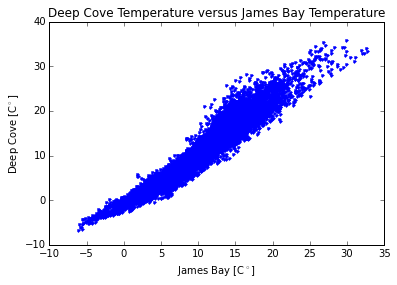

In [32]:
# YOUR CODE HERE
fig,ax=plt.subplots(1,1)
ax.plot(jb,dc,'.')
ax.set_xlabel('James Bay [C$^\circ $]');ax.set_ylabel('Deep Cove [C$^\circ $]')
ax.set_title('Deep Cove Temperature versus James Bay Temperature')

In [33]:
r  = np.sum(dc*jb)/np.std(jb,ddof=1)/np.std(dc,ddof=1)/(N-1)
print 'Correlation Co-efficient :%.3f' %r

Correlation Co-efficient :4.679


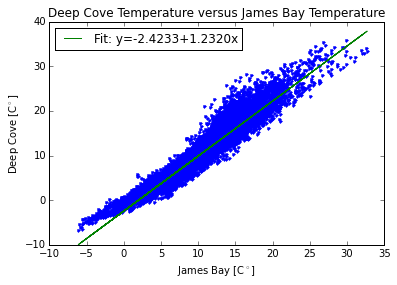

In [34]:
b = np.sum(jb*dc)-N*np.mean(jb)*np.mean(dc)
b = b/(np.sum(jb**2)-N*np.mean(jb)**2)
a = np.mean(dc)-b*np.mean(dc)
dchat=b*jb+a

fig,ax=plt.subplots(1,1)
ax.plot(jb,dc,'.')
ax.plot(jb,dchat,'-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
plt.legend(loc=0)
ax.set_xlabel('James Bay [C$^\circ $]');ax.set_ylabel('Deep Cove [C$^\circ $]')
ax.set_title('Deep Cove Temperature versus James Bay Temperature')

Slope b is between 1.227381 and 1.236608 with 95% probability


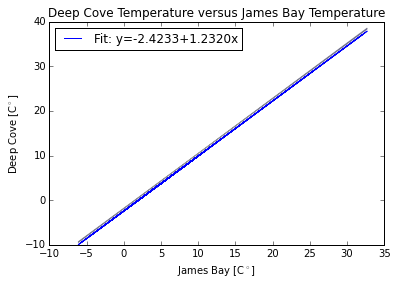

In [35]:
syx=np.sqrt(np.sum((dc-dchat)**2)/(N-2))
bdn,bup=stats.t.interval(0.95,df=N-2,scale=syx)
bb=np.array([bdn,bup])
bb=bb/np.sqrt(np.sum((jb-np.mean(jb))**2))
print 'Slope b is between %f and %f with 95%% probability'%(b+bb[0],b+bb[1])
jjb=np.sort(jb)

fig,ax=plt.subplots(1,1)
ax.plot(jb,dchat,'-',label='Fit: y=%1.4f+%1.4fx'%(a,b))
plt.legend(loc=0)
ax.set_xlabel('James Bay [C$^\circ $]');ax.set_ylabel('Deep Cove [C$^\circ $]')

yhathigh=(b+bb[1])*(jjb-np.mean(jb))+np.mean(dc)
yhatlow=(b+bb[0])*(jjb-np.mean(jb))+np.mean(dc)
ax.fill_between(jjb,yhathigh,yhatlow,alpha=0.4)
ax.set_title('Deep Cove Temperature versus James Bay Temperature')

The slope of the first graph was given to be 0.7565 with a 95% confidence interval of it being between 0.753791 and 0.759110. The slope of the second graph was given to be 1.2320 with a 95% confidence interval of it being between 1.227381 and 1.236608. 
These slopes are different are this was not expected nor was it expected. Without any prior knowledge to the data both were graphed as functions of each other, clearly the second method produced a graph that was more linear than the first just by obersving the slopes. And oberving the graphs with a line through the scatter plot, it can be seen the second method hit kore points in the scatter plot too, hence it being more linear.

**NOTE** There is a way to treat both axes independently called "Neutral Regression".  It is relatively simple, and involves normalizing the total distance of each point from the trend line. <a href="http://journals.ametsoc.org/doi/pdf/10.1175/1520-0426(1999)016%3C0876%3AAPFANR%3E2.0.CO%3B2">(Marsden 1999)</a>. This technique is strongly preferred if there is no reason to think that one data set is dependent on the other.  A caveat is that the data sets shoudl be normalized before fitting so that the "distance" has meaning.  